<a href="https://colab.research.google.com/github/gabrieldimas/machine-learning-study-2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UTS Machine Learning

Segmentasi Gambar dengan Clustering

Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For Data Manipulation
import numpy as np
import os
import random

# For Visualization
import cv2
import matplotlib.pyplot as plt

# For Preprocessing
from sklearn.decomposition import PCA

# For Modelling
from sklearn.cluster import KMeans, MiniBatchKMeans

In [3]:
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

KMeans Modelling

In [4]:
def kmeans_segmentation(image, k):
    # Jika citra berwarna
    if len(image.shape) == 3:
        pixels = image.reshape((-1, 3))
    # Jika citra grayscale
    elif len(image.shape) == 2:
        pixels = image.reshape((-1, 1))
    else:
        raise ValueError("Bentuk citra tidak didukung")

    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(pixels)

    # Gunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])
    return segmented_image

In [5]:
# Direktori dataset
dataset_dir = '/content/drive/MyDrive/Kuliah/MachineLearning/UTS/assets/plat/'

selected_images = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir)]

Print the Image

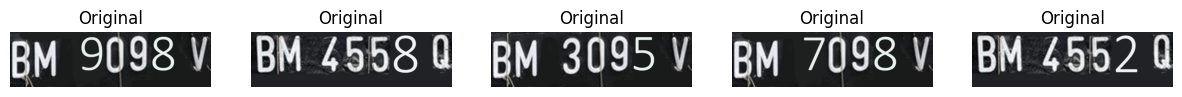

In [6]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

In [7]:
# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

In [8]:
segmented_images_pca = [kmeans_segmentation(img, 2) for img in reduced_images]

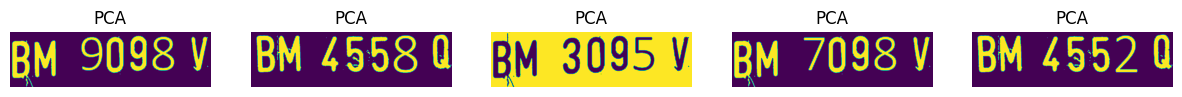

In [9]:
show_images(segmented_images_pca,['PCA']*len(segmented_images_pca))